## Importing Libraries

In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import statsmodels.api as sm
from sklearn import metrics

## Reading Dataset

In [595]:
hazardData = pd.read_csv('/Users/pratik_4511/Desktop/Northeastern University /Quarter_5A:B/Capstone/new_latest_01.csv')
hazardData.head(5)

,Hazard_type,Hazard_identification,hazard_identification_score,action_completed_date,FormSubmissionDate,potential_risk,potential_risk_score,further_action_required,immediate_action_required_and_performed,immediate_action_taken,...,Duration,per_first_name,per_last_name,per_gender,ReportSent,Supervisor,Supervisor_Name,action_status,sha_enable,Completion_Time_Bucket
0,Near Miss,Water,4.0,5/21/2017,2017-05-26T04:00:00.000Z,2201.0,5.0,0.0,1.0,Turn off water valve,...,NaN,Sean,Thibert,6454.0,2.0,1340,Sean Thibert,COMPLETE,1,Immediate
1,Stop & Correct,Working at Heights,3.0,6/30/2017,2017-05-28T04:00:00.000Z,2199.0,1.0,0.0,0.0,NaN,...,NaN,Curtis,Giroux,6454.0,2.0,489,Curtis Giroux,COMPLETE,1,Within 2 Months
2,Unsafe Act,Energy Sources,4.0,5/29/2017,2017-05-28T04:00:00.000Z,2201.0,5.0,1.0,1.0,Stopped work and had employee lock out.,...,60.0,Bradley,Hofford,6454.0,2.0,489,Bradley Hofford,COMPLETE,1,Within 1 Week
3,Unsafe Condition,Housekeeping,3.0,NaN,2017-05-28T04:00:00.000Z,2199.0,1.0,0.0,1.0,Informed Pierre B and Curtis G of the hazard a...,...,60.0,Bradley,Hofford,6454.0,2.0,489,Bradley Hofford,Complete,1,More than 1 Year
4,Unsafe Condition,Housekeeping,3.0,06/01/17,2017-05-28T04:00:00.000Z,2199.0,1.0,1.0,1.0,Informed Pierre B and Curtis G of the housekee...,...,NaN,Bradley,Hofford,6454.0,2.0,489,Bradley Hofford,COMPLETE,1,Within 1 Week


In [596]:
hazardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13420 entries, 0 to 13419
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Hazard_type                              13420 non-null  object 
 1   Hazard_identification                    13393 non-null  object 
 2   hazard_identification_score              13413 non-null  float64
 3   action_completed_date                    6491 non-null   object 
 4   FormSubmissionDate                       13420 non-null  object 
 5   potential_risk                           13375 non-null  float64
 6   potential_risk_score                     13409 non-null  float64
 7   further_action_required                  13407 non-null  float64
 8   immediate_action_required_and_performed  13411 non-null  float64
 9   immediate_action_taken                   8348 non-null   object 
 10  recommended_action                       6654 

In [597]:
hazardData['Completion_Time_Bucket'].unique()

array(['Immediate', 'Within 2 Months', 'Within 1 Week',
       'More than 1 Year', 'Within 2 Weeks', 'Within 1 Month',
       'More than 2 Months', nan], dtype=object)

In [598]:
# Drop null values from the 'Completion_Time_Bucket' column
hazardData = hazardData.dropna(subset=['Completion_Time_Bucket'])


In [599]:
### ---> Merrging the classes to make : Immediate <--- ###
hazardData['Completion_Time_Bucket'] = hazardData['Completion_Time_Bucket'].replace(
    {
        'Within 1 Week': 'Immediate', 
        'Within 2 Weeks': 'Immediate'
     }
    )

In [600]:
### ---> Merrging the classes to make : Within 2 Months <--- ###
hazardData['Completion_Time_Bucket'] = hazardData['Completion_Time_Bucket'].replace(
    {
        'Within 2 Months':'Within 2 Months', 
        'Within 1 Month' :'Within 2 Months',
        
    }
)

In [601]:
### ---> Merging the classes to make : More than 2 Months <--- ###
hazardData['Completion_Time_Bucket'] = hazardData['Completion_Time_Bucket'].replace(
    {
        'More than 2 Months':'More than 2 months',
        'More than 1 Year':'More than 2 months',
    }
)

In [170]:
### -----> Use this just for top selected class <------ ###

# Define the values to be removed
values_to_remove = ['Within 2 Months', 'Within 1 Week', 'Within 2 Weeks', 'More than 2 Months']

# Remove the values from the Completion_Time_Bucket column
hazardData = hazardData[~hazardData['Completion_Time_Bucket'].isin(values_to_remove)]


In [602]:
hazardData['Completion_Time_Bucket'].unique()

array(['Immediate', 'Within 2 Months', 'More than 2 months'], dtype=object)

## Cleaning Phase

In [603]:
# -----> 1. data info <------ #
hazardData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13347 entries, 0 to 13346
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Hazard_type                              13347 non-null  object 
 1   Hazard_identification                    13320 non-null  object 
 2   hazard_identification_score              13345 non-null  float64
 3   action_completed_date                    6465 non-null   object 
 4   FormSubmissionDate                       13347 non-null  object 
 5   potential_risk                           13302 non-null  float64
 6   potential_risk_score                     13341 non-null  float64
 7   further_action_required                  13334 non-null  float64
 8   immediate_action_required_and_performed  13338 non-null  float64
 9   immediate_action_taken                   8322 non-null   object 
 10  recommended_action                       6590 

In [604]:
### ------>  Dropping the Duplicate and unnecessary columns <----- ###

# Drop columns from the DataFrame
#columns_to_drop = ['immediate_action_taken.1','recommended_action.1','Duration','Supervisor']
columns_to_drop = ['Duration','Supervisor']
hazardData.drop(columns=columns_to_drop, inplace=True)

# Checking for duplicate values
hazardData.duplicated().sum()

23

In [605]:
hazardData = hazardData.drop_duplicates()
hazardData.head(5)

,Hazard_type,Hazard_identification,hazard_identification_score,action_completed_date,FormSubmissionDate,potential_risk,potential_risk_score,further_action_required,immediate_action_required_and_performed,immediate_action_taken,...,SiteLevel,Workplace,per_first_name,per_last_name,per_gender,ReportSent,Supervisor_Name,action_status,sha_enable,Completion_Time_Bucket
0,Near Miss,Water,4.0,5/21/2017,2017-05-26T04:00:00.000Z,2201.0,5.0,0.0,1.0,Turn off water valve,...,4331,1860 up ramp,Sean,Thibert,6454.0,2.0,Sean Thibert,COMPLETE,1,Immediate
1,Stop & Correct,Working at Heights,3.0,6/30/2017,2017-05-28T04:00:00.000Z,2199.0,1.0,0.0,0.0,NaN,...,4320,Nickel Rim South,Curtis,Giroux,6454.0,2.0,Curtis Giroux,COMPLETE,1,Within 2 Months
2,Unsafe Act,Energy Sources,4.0,5/29/2017,2017-05-28T04:00:00.000Z,2201.0,5.0,1.0,1.0,Stopped work and had employee lock out.,...,4324,"Shop, 1780L, 1820L, and Ramp",Bradley,Hofford,6454.0,2.0,Bradley Hofford,COMPLETE,1,Immediate
3,Unsafe Condition,Housekeeping,3.0,NaN,2017-05-28T04:00:00.000Z,2199.0,1.0,0.0,1.0,Informed Pierre B and Curtis G of the hazard a...,...,4324,"Shop, 1780L, 1820L, and Ramp",Bradley,Hofford,6454.0,2.0,Bradley Hofford,Complete,1,More than 2 months
4,Unsafe Condition,Housekeeping,3.0,06/01/17,2017-05-28T04:00:00.000Z,2199.0,1.0,1.0,1.0,Informed Pierre B and Curtis G of the housekee...,...,4329,NRD ramp from top to 1820L,Bradley,Hofford,6454.0,2.0,Bradley Hofford,COMPLETE,1,Immediate


In [606]:
### ------> instead of dropping the null values we are replacing with 'Not Specified' <------- ###   

import pandas as pd

# Replace NaN values in 'immediate_action_taken' column with 'Not Specified'
hazardData['immediate_action_taken'].fillna('Not Specified', inplace=True)

# Verify the changes
print(hazardData['immediate_action_taken'].value_counts())

# ---------------------------------------------------------------------------------- #

# Replace NaN values in 'recommended_action' column with 'Not Specified'
hazardData['recommended_action'].fillna('Not Specified', inplace=True)

# Verify the changes
print(hazardData['recommended_action'].value_counts())

Not Specified                                                                                                                                                                                                 5012
Yes                                                                                                                                                                                                             41
Yes                                                                                                                                                                                                             18
 test immediate action taken                                                                                                                                                                                    17
Selenium test immediate action taken                                                                                                                        

In [531]:
### ----> Dropping unnessary columns <----- ###

columns_to_drop2 = ['per_gender','action_status','Duration']
#columns_to_drop2 = ['action_completed_date']
hazardData.drop(columns=columns_to_drop2, inplace=True)

KeyError: "['Duration'] not found in axis"

Check duplicates:
 0 

Check missing values:
 Hazard_type                                   0
Hazard_identification                        27
hazard_identification_score                   2
action_completed_date                      6864
FormSubmissionDate                            0
potential_risk                               45
potential_risk_score                          6
further_action_required                      13
immediate_action_required_and_performed       9
immediate_action_taken                        0
recommended_action                            0
immediate_action_score                     1579
completed_action_score                      386
Site                                          0
SiteLevel                                     0
Workplace                                     1
per_first_name                                0
per_last_name                                 0
per_gender                                  142
ReportSent                                

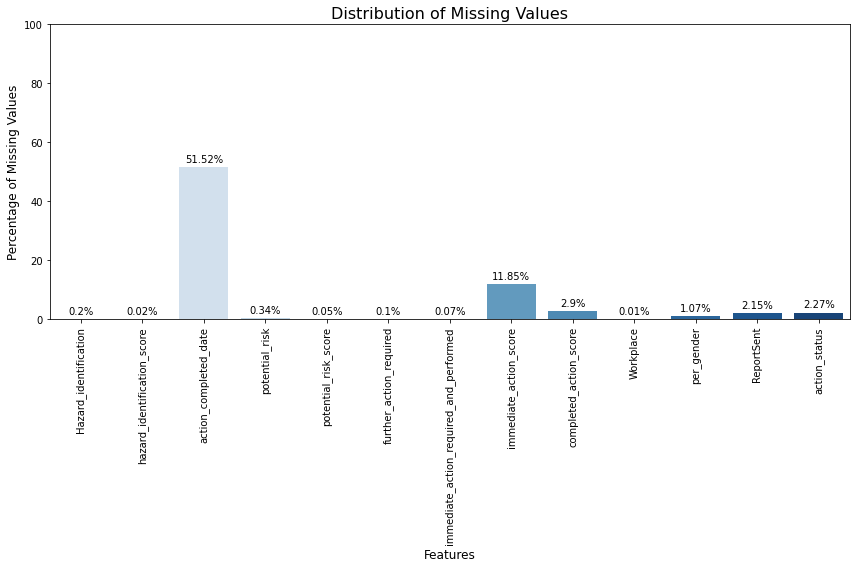

In [607]:
### -----> Dealing with Duplicates <------ ###


def missing_data(df):
    print("Check duplicates:\n", df.duplicated().sum(), "\n")
    print("Check missing values:\n", df.isna().sum(), "\n")
    
    # Analyzing missing data
    missing_data = df.isnull().sum().reset_index()
    missing_data.columns = ['Feature', 'Missing Values']
    missing_data = missing_data[missing_data['Missing Values'] > 0].reset_index(drop=True)
    missing_data['Percentage of Missing Values'] = round((missing_data['Missing Values'] / len(df)) * 100, 2)
    print("Missing data:\n", missing_data, "\n")
    
    # Plot missing data
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = sns.color_palette("Blues", len(missing_data))
    sns.barplot(x='Feature', y='Percentage of Missing Values', data=missing_data, ax=ax, palette=colors)
    ax.set_ylim(0, 100)
    ax.set_title('Distribution of Missing Values', fontsize=16)
    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Percentage of Missing Values', fontsize=12)
    
    # Add percentage labels to the bars
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1,
                f"{missing_data['Percentage of Missing Values'].values[i]}%",
                ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

missing_data(hazardData)

In [608]:
### ---> Dropping the NULL valeus <--- ###

hazardData = hazardData.dropna(subset=['Hazard_identification', 'potential_risk','potential_risk_score','further_action_required',
                                       'completed_action_score','Workplace','ReportSent','action_completed_date', 'immediate_action_score','action_status'])


In [609]:
hazardData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4676 entries, 0 to 13339
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Hazard_type                              4676 non-null   object 
 1   Hazard_identification                    4676 non-null   object 
 2   hazard_identification_score              4676 non-null   float64
 3   action_completed_date                    4676 non-null   object 
 4   FormSubmissionDate                       4676 non-null   object 
 5   potential_risk                           4676 non-null   float64
 6   potential_risk_score                     4676 non-null   float64
 7   further_action_required                  4676 non-null   float64
 8   immediate_action_required_and_performed  4676 non-null   float64
 9   immediate_action_taken                   4676 non-null   object 
 10  recommended_action                       4676 n

In [610]:
### ----> Assigning the values to MALE/FEMALE <---- ###

# Replace values in 'per_gender' column
hazardData['per_gender'] = hazardData['per_gender'].replace({6454.0: 'Male', 8610.0: 'Female'})

# Verify the updated DataFrame
print(hazardData['per_gender'].value_counts())

print("Null values : ",hazardData['per_gender'].isnull().sum())

# Drop rows with null values in 'per_gender' column
hazardData.dropna(subset=['per_gender'], inplace=True)

# Drop rows with null values in 'immediate_action_score' column
hazardData.dropna(subset=['immediate_action_score'], inplace=True)

hazardData.shape

#-------------------------------------------------------------#

### ----> Making the 'action_status' in Lower case <---- ###

# Convert 'action_status' values to lowercase
#hazardData['action_status'] = hazardData['action_status'].str.lower()

# Verify the updated DataFrame
#print(hazardData['action_status'].value_counts())

Male      4581
Female      62
Name: per_gender, dtype: int64
Null values :  33


(4643, 24)

## Visualization

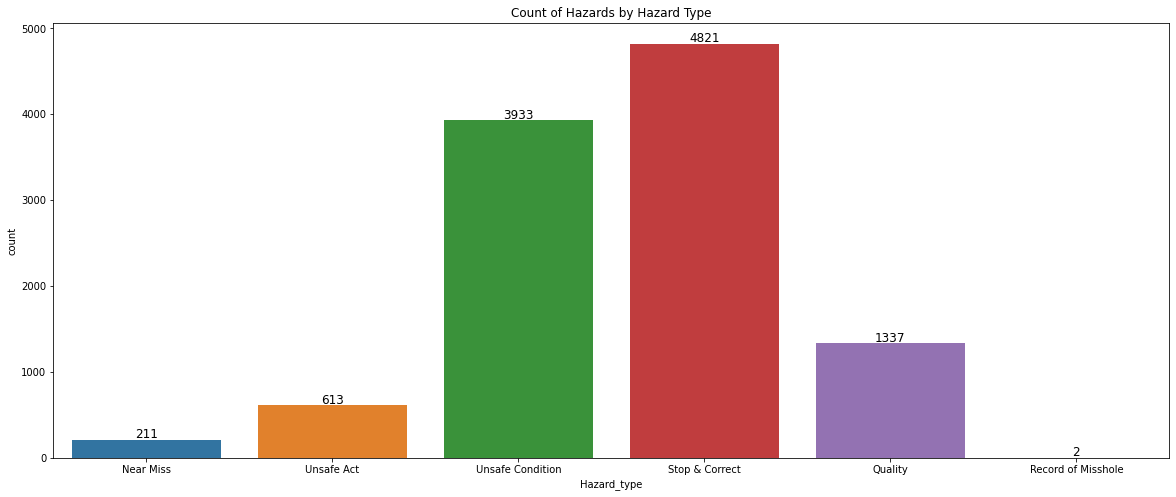

In [392]:
#1 

# Bar chart for count of hazards based on Hazard Type
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='Hazard_type', data=hazardData)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.title('Count of Hazards by Hazard Type')
plt.show()

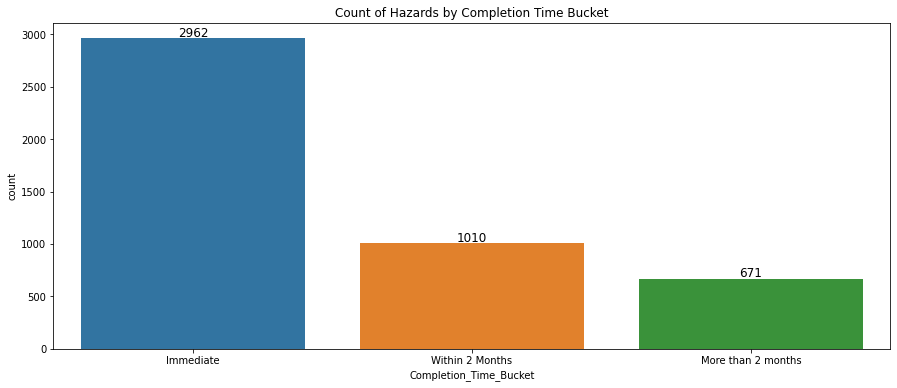

In [537]:
# Bar chart for count of hazards based on Completion_Time_Bucket
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Completion_Time_Bucket', data=hazardData)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.title('Count of Hazards by Completion Time Bucket')
plt.show()

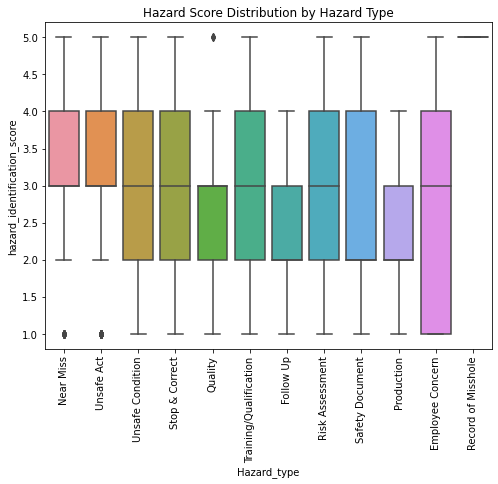

In [194]:
# Box plot for hazard score distribution based on Hazard_type
plt.figure(figsize=(8,6))
sns.boxplot(x='Hazard_type', y='hazard_identification_score', data=hazardData)
plt.title('Hazard Score Distribution by Hazard Type')
plt.xticks(rotation=90)
plt.show()

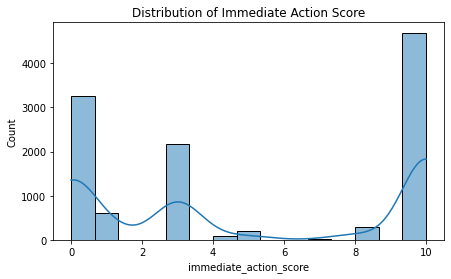

In [226]:
# Histogram for immediate_action_score
plt.figure(figsize=(7,4))
sns.histplot(data=hazardData, x='immediate_action_score', kde=True)
plt.title('Distribution of Immediate Action Score')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


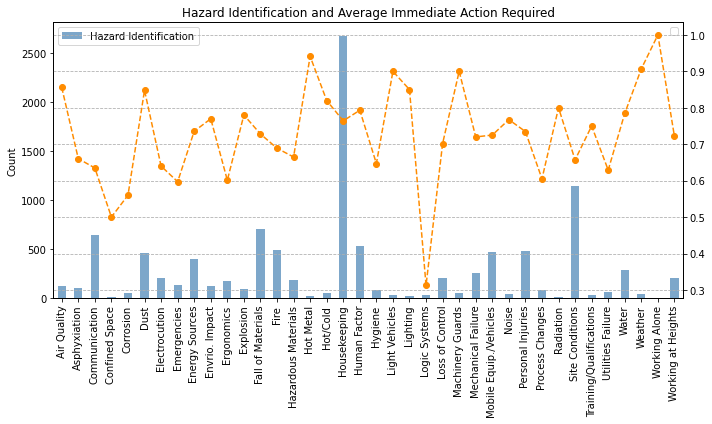

In [324]:

# Prepare the data for the bar chart
bar_data = hazardData['Hazard_identification'].value_counts().sort_index()

# Prepare the data for the line chart
line_data = hazardData.groupby('Hazard_identification')['immediate_action_required_and_performed'].mean().sort_index()

# Create the combination graph
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Bar chart
bar_data.plot(kind='bar', color='steelblue', alpha=0.7, label='Hazard Identification', ax=ax1)
ax1.set_ylabel('Count')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Line chart
ax2 = ax1.twinx()
line_data.plot(secondary_y=True, color='darkorange', linestyle='--', marker='o', label='Avg. Immediate Action Required', ax=ax2)
ax2.set_ylabel('Average Immediate Action Required')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Customize the graph
plt.title('Hazard Identification and Average Immediate Action Required')
plt.xlabel('Hazard Identification')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


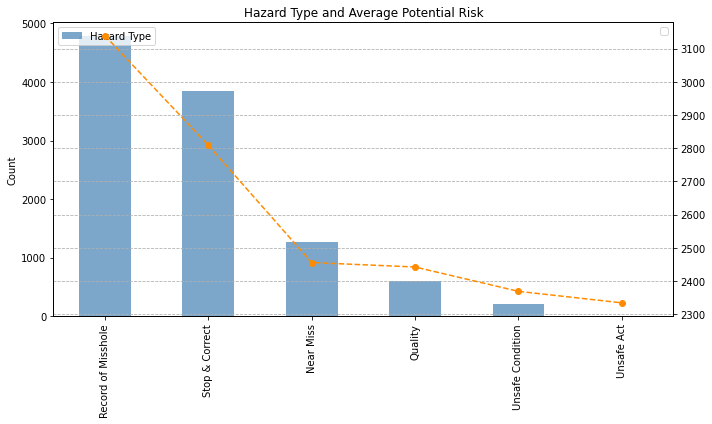

In [325]:
#5

# Prepare the data for the bar chart
bar_data = hazardData['Hazard_type'].value_counts().sort_values(ascending=False)

# Prepare the data for the line chart
line_data = hazardData.groupby('Hazard_type')['potential_risk'].mean().sort_values(ascending=False)

# Create the combination graph
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Bar chart
bar_data.plot(kind='bar', color='steelblue', alpha=0.7, label='Hazard Type', ax=ax1)
ax1.set_ylabel('Count')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Line chart
ax2 = ax1.twinx()
line_data.plot(secondary_y=True, color='darkorange', linestyle='--', marker='o', label='Average Potential Risk', ax=ax2)
ax2.set_ylabel('Average Potential Risk')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Customize the graph
plt.title('Hazard Type and Average Potential Risk')
plt.xlabel('Hazard Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

## Preparing for Machine Learning Model

In [611]:
### -----> 'Hazard_Type' <------- ###

cols = ['Hazard_type', 'Hazard_identification', 'Completion_Time_Bucket', 'immediate_action_taken', 'recommended_action', 'Workplace', 'Supervisor_Name']
print(hazardData[cols].nunique())

Hazard_type                  6
Hazard_identification       37
Completion_Time_Bucket       3
immediate_action_taken    1707
recommended_action        4566
Workplace                 2161
Supervisor_Name            224
dtype: int64


In [612]:
### -----> All categorical variables ready for Lable Encode <---- ###

from sklearn.preprocessing import LabelEncoder

cols2 = ['Hazard_identification', 'immediate_action_taken', 'recommended_action', 'Workplace', 'Completion_Time_Bucket','Hazard_type', 'Supervisor_Name']
encoder = LabelEncoder()
for col in cols2:
    hazardData[col] = encoder.fit_transform(hazardData[col])

# Print the updated DataFrame
print(hazardData)

       Hazard_type  Hazard_identification  hazard_identification_score  \
0                0                     34                          4.0   
2                4                      8                          4.0   
4                5                     17                          3.0   
5                5                     10                          2.0   
7                5                     26                          3.0   
...            ...                    ...                          ...   
13237            1                      2                          2.0   
13238            1                      2                          2.0   
13248            0                      1                          5.0   
13291            0                      1                          5.0   
13292            3                      1                          5.0   

      action_completed_date        FormSubmissionDate  potential_risk  \
0                 5/21/2017  2017-05-2

In [613]:
### ----> Dropping unnessary columns <----- ###

columns_to_drop2 = ['per_first_name','per_last_name','FormSubmissionDate']
hazardData.drop(columns=columns_to_drop2, inplace=True)

In [614]:
hazardData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4643 entries, 0 to 13292
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Hazard_type                              4643 non-null   int64  
 1   Hazard_identification                    4643 non-null   int64  
 2   hazard_identification_score              4643 non-null   float64
 3   action_completed_date                    4643 non-null   object 
 4   potential_risk                           4643 non-null   float64
 5   potential_risk_score                     4643 non-null   float64
 6   further_action_required                  4643 non-null   float64
 7   immediate_action_required_and_performed  4643 non-null   float64
 8   immediate_action_taken                   4643 non-null   int64  
 9   recommended_action                       4643 non-null   int64  
 10  immediate_action_score                   4643 n

In [615]:
### -----> This pure data without having nay null values <---- ###

hazardData.isnull().sum()

Hazard_type                                0
Hazard_identification                      0
hazard_identification_score                0
action_completed_date                      0
potential_risk                             0
potential_risk_score                       0
further_action_required                    0
immediate_action_required_and_performed    0
immediate_action_taken                     0
recommended_action                         0
immediate_action_score                     0
completed_action_score                     0
Site                                       0
SiteLevel                                  0
Workplace                                  0
per_gender                                 0
ReportSent                                 0
Supervisor_Name                            0
action_status                              0
sha_enable                                 0
Completion_Time_Bucket                     0
dtype: int64

In [616]:
### ----> Prepration for Traget Variable : Completion_Time_Bucket <----- ###

hazardData['Completion_Time_Bucket'].unique()
hazardData['Completion_Time_Bucket'].value_counts()

0    2962
2    1010
1     671
Name: Completion_Time_Bucket, dtype: int64

## ML Model : XG-Boost (1)

In [544]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [545]:
hazardData.drop(columns='Supervisor_Name', inplace=True)


/var/folders/0j/7r8blzjd6q97qbmmc643xsvw0000gn/T/ipykernel_89016/3560768330.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [546]:
hazardData.drop(columns='per_gender', inplace=True)

/var/folders/0j/7r8blzjd6q97qbmmc643xsvw0000gn/T/ipykernel_89016/219096849.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [547]:
hazardData.drop(columns='action_status', inplace=True)

/var/folders/0j/7r8blzjd6q97qbmmc643xsvw0000gn/T/ipykernel_89016/1178868829.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [548]:
hazardData.drop(columns='action_completed_date', inplace=True)
#hazardData.drop(columns='FormSubmissionDate',inplace=True)

/var/folders/0j/7r8blzjd6q97qbmmc643xsvw0000gn/T/ipykernel_89016/176243378.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [549]:
#### ---------> Training and Testing split <----------- ###

x = hazardData.drop(['Completion_Time_Bucket'],axis=1)
y = hazardData['Completion_Time_Bucket']

# Specify the test size for the minority class
test_size_minority = 0.3

feature_names = x.columns.tolist()

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_minority, stratify=y)

In [550]:
### ---------> RFE with Cross Validation <--------- #### 

from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model1 = XGBClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator = model1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)   ## x_trin_balanced / y_train_balanced 

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


In [551]:
### -------> Feature selection with RFE <-------- ###
rfe = RFE(model1, n_features_to_select=7)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model1).__name__}")
print("Selected Features from this model : \n", selected_features_df)

XGBClassifier
Selected Features from this model : 
          Selected Features
0           potential_risk
1  further_action_required
2   immediate_action_score
3   completed_action_score
4                     Site
5                SiteLevel
6                Workplace


In [552]:
start_time = time.time() 

model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=500)

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 4.59 seconds
XGBClassifier: Selected features = 7, Accuracy = 0.63, Precision = 0.6010448356751483
Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.82      0.77       889
           1       0.38      0.26      0.31       201
           2       0.40      0.31      0.35       303

    accuracy                           0.63      1393
   macro avg       0.50      0.47      0.48      1393
weighted avg       0.60      0.63      0.61      1393



## ML Model : XG-Boost (2) - with balanced data

In [499]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [553]:
#### ---------> Training and Testing split <----------- ###

x = hazardData.drop(['Completion_Time_Bucket'],axis=1)
y = hazardData['Completion_Time_Bucket']

# Specify the test size for the minority class
test_size_minority = 0.3

feature_names = x.columns.tolist()

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_minority, stratify=y)

In [554]:
### -----> Applying SMOTE <----- ###

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


print("Before Upsampling, counts of label '0': {}".format(sum(y_train==0))) 
print ("Before Upsampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Upsampling, counts of label '2': {}\n".format(sum(y_train==2))) 
#print ("Before Upsampling, counts of label '3': {}".format(sum(y_train==3)))
#print("Before Upsampling, counts of label '4': {}".format(sum(y_train==4))) 
#print ("Before Upsampling, counts of label '5': {}".format(sum(y_train==5)))
#print ("Before Upsampling, counts of label '6': {} \n".format(sum(y_train==6)))

# Perform oversampling on minority classes
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
x_train_oversampled, y_train_oversampled = ros.fit_resample(x_train, y_train)

# Perform undersampling on majority class
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_train_balanced, y_train_balanced = rus.fit_resample(x_train_oversampled, y_train_oversampled)

print("After Upsampling, counts of label '0': {}".format(sum(y_train_balanced==0))) 
print ("After Upsampling, counts of label '1': {}".format(sum(y_train_balanced==1)))
print("After Upsampling, counts of label '2': {}\n".format(sum(y_train_balanced==2))) 
#print ("After Upsampling, counts of label '3': {}".format(sum(y_train_balanced==3)))
#print("After Upsampling, counts of label '4': {}".format(sum(y_train_balanced==4))) 
#print ("After Upsampling, counts of label '5': {}".format(sum(y_train_balanced==5)))
#print ("After Upsampling, counts of label '6': {} \n".format(sum(y_train_balanced==6)))

Before Upsampling, counts of label '0': 2073
Before Upsampling, counts of label '1': 470
Before Upsampling, counts of label '2': 707

After Upsampling, counts of label '0': 2073
After Upsampling, counts of label '1': 2073
After Upsampling, counts of label '2': 2073



In [555]:
### ---------> RFE with Cross Validation <--------- #### 

from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model1 = XGBClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator = model1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train_balanced, y_train_balanced)   ## x_trin_balanced / y_train_balanced 

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 14


In [556]:
### -------> Feature selection with RFE <-------- ###

rfe = RFE(model1, n_features_to_select=14)        
X_train_rfe = rfe.fit_transform(x_train_balanced, y_train_balanced)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model1).__name__}")
print("Selected Features from this model : \n", selected_features_df)

XGBClassifier
Selected Features from this model : 
                           Selected Features
0                               Hazard_type
1                     Hazard_identification
2               hazard_identification_score
3                            potential_risk
4                      potential_risk_score
5                   further_action_required
6   immediate_action_required_and_performed
7                    immediate_action_taken
8                        recommended_action
9                    immediate_action_score
10                   completed_action_score
11                                     Site
12                                SiteLevel
13                                Workplace


In [557]:
start_time = time.time() 

model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=500)

# Training the model
model.fit(X_train_rfe, y_train_balanced)

# Testing the model
y_pred2 = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred2))  

Execution time: 10.61 seconds
XGBClassifier: Selected features = 14, Accuracy = 0.61, Precision = 0.5882335258489166
Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74       889
           1       0.43      0.37      0.40       201
           2       0.32      0.27      0.29       303

    accuracy                           0.61      1393
   macro avg       0.49      0.47      0.48      1393
weighted avg       0.59      0.61      0.60      1393



## ML Model : Random Forest (1)

In [291]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [558]:
#### ---------> Training and Testing split <----------- ###

x = hazardData.drop(['Completion_Time_Bucket'],axis=1)
y = hazardData['Completion_Time_Bucket']

# Specify the test size for the minority class
test_size_minority = 0.3

feature_names = x.columns.tolist()

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_minority, stratify=y)

In [559]:
### ---------> RFE with Cross Validation <--------- #### 

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model1 = RandomForestClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator = model1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)   ## x_trin_balanced / y_train_balanced 

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


In [561]:
### -------> Feature selection with RFE <-------- ###
rfe = RFE(model1, n_features_to_select=7)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model1).__name__}")
print("Selected Features from this model : \n", selected_features_df)

RandomForestClassifier
Selected Features from this model : 
         Selected Features
0   Hazard_identification
1          potential_risk
2  immediate_action_taken
3      recommended_action
4                    Site
5               SiteLevel
6               Workplace


In [562]:
start_time = time.time() 

model = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 7.68 seconds
RandomForestClassifier: Selected features = 7, Accuracy = 0.65, Precision = 0.6000362577399501
Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.89      0.78       889
           1       0.44      0.23      0.30       201
           2       0.43      0.21      0.28       303

    accuracy                           0.65      1393
   macro avg       0.52      0.44      0.46      1393
weighted avg       0.60      0.65      0.60      1393



## ML Model : Random Forest - (2) - with balanced data

In [573]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [574]:
#### ---------> Training and Testing split <----------- ###

x = hazardData.drop(['Completion_Time_Bucket'],axis=1)
y = hazardData['Completion_Time_Bucket']

# Specify the test size for the minority class
test_size_minority = 0.3

feature_names = x.columns.tolist()

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_minority, stratify=y)

In [575]:
### -----> Applying SMOTE <----- ###

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


print("Before Upsampling, counts of label '0': {}".format(sum(y_train==0))) 
print ("Before Upsampling, counts of label '1': {} ".format(sum(y_train==1)))
print("Before Upsampling, counts of label '2': {}\n".format(sum(y_train==2))) 
#print ("Before Upsampling, counts of label '3': {} \n".format(sum(y_train==3)))
#print("Before Upsampling, counts of label '4': {}".format(sum(y_train==4))) 

# Perform undersampling on majority class
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_train_balanced, y_train_balanced = rus.fit_resample(x_train_oversampled, y_train_oversampled)

# Perform oversampling on minority classes
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
x_train_oversampled, y_train_oversampled = ros.fit_resample(x_train, y_train)

print("After Upsampling, counts of label '0': {}".format(sum(y_train_balanced==0))) 
print ("After Upsampling, counts of label '1': {} ".format(sum(y_train_balanced==1)))
print("After Upsampling, counts of label '2': {}\n".format(sum(y_train_balanced==2))) 
#print ("After Upsampling, counts of label '3': {} \n".format(sum(y_train_balanced==3)))
#print("After Upsampling, counts of label '4': {}".format(sum(y_train_balanced==4))) 

Before Upsampling, counts of label '0': 2073
Before Upsampling, counts of label '1': 470 
Before Upsampling, counts of label '2': 707

After Upsampling, counts of label '0': 2073
After Upsampling, counts of label '1': 2073 
After Upsampling, counts of label '2': 2073



In [576]:
### ---------> RFE with Cross Validation <--------- #### 

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model1 = RandomForestClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator = model1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train_balanced, y_train_balanced)   ## x_trin_balanced / y_train_balanced 

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_) 

Optimal number of features : 12


In [577]:
### -------> Feature selection with RFE <-------- ###
rfe = RFE(model1, n_features_to_select= 12)        
X_train_rfe = rfe.fit_transform(x_train_balanced, y_train_balanced)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model1).__name__}")
print("Selected Features from this model : \n", selected_features_df)

RandomForestClassifier
Selected Features from this model : 
               Selected Features
0                   Hazard_type
1         Hazard_identification
2   hazard_identification_score
3                potential_risk
4          potential_risk_score
5        immediate_action_taken
6            recommended_action
7        immediate_action_score
8        completed_action_score
9                          Site
10                    SiteLevel
11                    Workplace


In [578]:
start_time = time.time() 

model = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)

# Training the model
model.fit(X_train_rfe, y_train_balanced)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 9.91 seconds
RandomForestClassifier: Selected features = 12, Accuracy = 0.90, Precision = 0.9034725509770755
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       889
           1       0.87      0.85      0.86       201
           2       0.87      0.80      0.83       303

    accuracy                           0.90      1393
   macro avg       0.89      0.87      0.88      1393
weighted avg       0.90      0.90      0.90      1393



Feature Importances:
                        Feature  Importance
6            recommended_action    0.175113
11                    Workplace    0.169148
10                    SiteLevel    0.146173
1         Hazard_identification    0.097350
9                          Site    0.070285
5        immediate_action_taken    0.059054
3                potential_risk    0.058716
8        completed_action_score    0.052247
2   hazard_identification_score    0.052048
0                   Hazard_type    0.047477
4          potential_risk_score    0.042228
7        immediate_action_score    0.030162


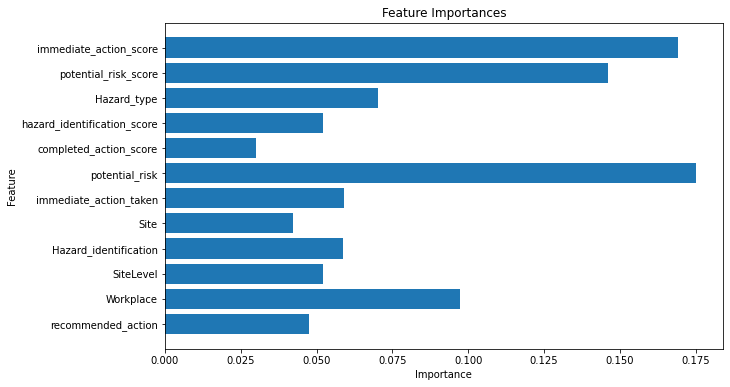

In [592]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importances
feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# Sort the features by their importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Display the feature importances with names
print("Feature Importances:")
print(feature_importances)

# Create a bar plot to visualize the importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), feature_importances['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


## ML Model : Logicstic Regreesion

In [644]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [645]:
hazardData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4643 entries, 0 to 13292
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hazard_identification_score  4643 non-null   float64
 1   potential_risk               4643 non-null   float64
 2   potential_risk_score         4643 non-null   float64
 3   further_action_required      4643 non-null   float64
 4   immediate_action_score       4643 non-null   float64
 5   completed_action_score       4643 non-null   float64
 6   ReportSent                   4643 non-null   float64
 7   sha_enable                   4643 non-null   int64  
 8   Completion_Time_Bucket       4643 non-null   int64  
 9   Hazard_type_0                4643 non-null   uint8  
 10  Hazard_type_1                4643 non-null   uint8  
 11  Hazard_type_2                4643 non-null   uint8  
 12  Hazard_type_3                4643 non-null   uint8  
 13  Hazard_type_4    

In [646]:
### ---> Dropping unnecessary columns <--- ###

hazardData.drop(columns=[
    'immediate_action_taken', 
    'recommended_action', 
    'Workplace', 
    'immediate_action_required_and_performed',
    'Site',
    'SiteLevel',
    'per_gender',
    'Supervisor_Name',
    'action_status',
    ],inplace=True)



KeyError: "['immediate_action_taken', 'recommended_action', 'Workplace', 'immediate_action_required_and_performed', 'Site', 'SiteLevel', 'per_gender', 'Supervisor_Name', 'action_status'] not found in axis"

In [631]:
hazardData.drop(columns='action_completed_date',inplace = True)

In [647]:
### ---> Getting dummies <--- ###

# Create dummies for Hazard_Type and Hazard_identification
hazardData = pd.get_dummies(hazardData, columns=['Hazard_type', 'Hazard_identification'])

KeyError: "None of [Index(['Hazard_type', 'Hazard_identification'], dtype='object')] are in the [columns]"

In [648]:
hazardData.shape

(4643, 52)

In [649]:
#### ---------> Training and Testing split <----------- ###

x = hazardData.drop(['Completion_Time_Bucket'],axis=1)
y = hazardData['Completion_Time_Bucket']

# Specify the test size for the minority class
test_size_minority = 0.3

feature_names = x.columns.tolist()

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_minority, stratify=y)